<a href="https://colab.research.google.com/github/THENIROCK/MachineLearningProjects/blob/main/music_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

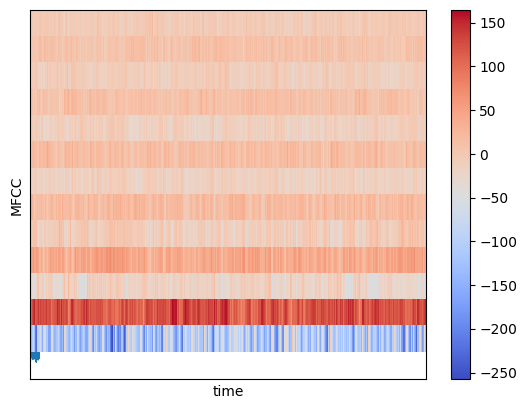

In [12]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

file = "blues.00000.wav"

#waveform
signal, sr = librosa.load(file, sr=22050) #sr (sample rate) * T = 22050 * 30
librosa.display.waveshow(signal, sr=sr)
# plt.xlabel("time")
# plt.ylabel("amplitude")
# plt.show()

# fft to spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency/2))]
left_magnitude = magnitude[:int(len(frequency/2))]

# plt.plot(frequency, magnitude)
# plt.xLabel("freq")
# plt.yLabel("mag")
# plt.show()

# short sample fft to spectogram
n_fft = 2048 #number samples
hop_length = 512 #shift amount

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

# librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
# plt.xlabel("time")
# plt.ylabel("freq")
# plt.colorbar()
# plt.show()

# MFCCs
MFCCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# note, number of coefficients is 13
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')